<a href="https://colab.research.google.com/github/Priyankapawar1224/--Principal-Component-Analysis-PCA-/blob/main/Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/HR-Employee-Attrition.csv")
print("Original Data Shape:", df.shape)
features_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
X = df.drop(columns=features_to_drop + ['Attrition'])
y = df['Attrition'].map({'Yes': 1, 'No': 0}) # Convert target variable to numeric
print(f"Features dropped: {features_to_drop} and the target 'Attrition'.")
X_encoded = pd.get_dummies(X, drop_first=True)
print("Shape after One-Hot Encoding:", X_encoded.shape)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

print("\nData preparation and scaling complete. Ready for PCA.")
print("Scaled Data Shape (Features for PCA):", X_scaled_df.shape)

Original Data Shape: (1470, 35)
Features dropped: ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'] and the target 'Attrition'.
Shape after One-Hot Encoding: (1470, 44)

Data preparation and scaling complete. Ready for PCA.
Scaled Data Shape (Features for PCA): (1470, 44)


Total Original Features (after encoding): 44
Number of Principal Components needed for 90% variance: 28


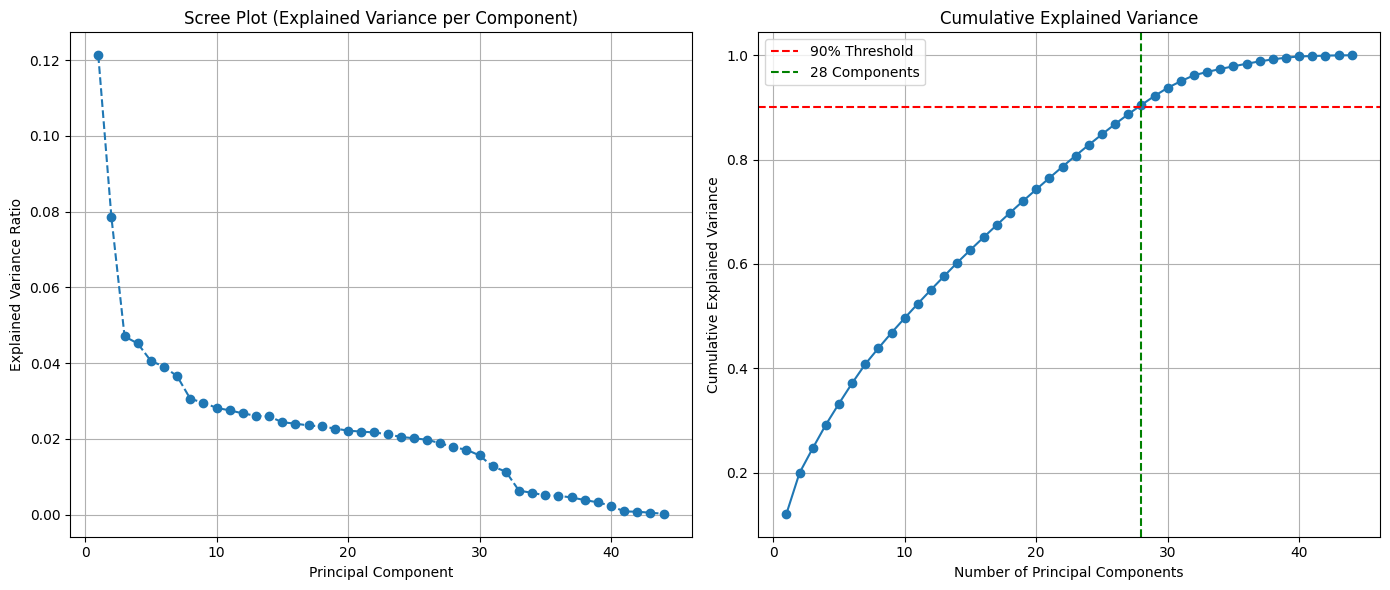

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()
pca.fit(X_scaled_df)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

optimal_k = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Total Original Features (after encoding): {X_scaled_df.shape[1]}")
print(f"Number of Principal Components needed for 90% variance: {optimal_k}")
-
plt.figure(figsize=(14, 6))

# Scree Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot (Explained Variance per Component)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

# Cumulative Variance Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.axvline(x=optimal_k, color='g', linestyle='--', label=f'{optimal_k} Components')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Original number of features: 44
Reduced number of features (kPCA): 2


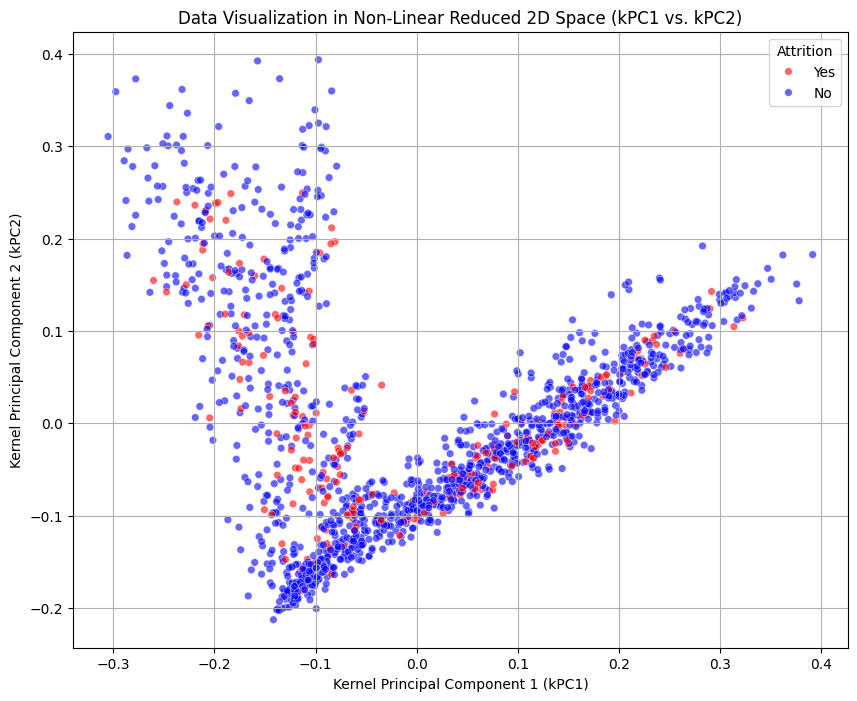

In [27]:

kpca = KernelPCA(
    n_components=2,
    kernel="rbf",
    gamma=0.04
X_kpca = kpca.fit_transform(X_scaled_df)
X_kpca_df = pd.DataFrame(data=X_kpca, columns=['kPC1', 'kPC2'])
X_kpca_df['Attrition'] = y_labels
print('Original number of features:', X_scaled_df.shape[1])
print('Reduced number of features (kPCA):', X_kpca_df.shape[1] - 1)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='kPC1',
    y='kPC2',
    hue='Attrition',
    data=X_kpca_df,
    palette={'No': 'blue', 'Yes': 'red'},
    alpha=0.6,
    s=30
)
plt.title('Data Visualization in Non-Linear Reduced 2D Space (kPC1 vs. kPC2)')
plt.xlabel('Kernel Principal Component 1 (kPC1)')
plt.ylabel('Kernel Principal Component 2 (kPC2)')
plt.grid(True)
plt.show()

In [28]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)
pca = PCA(n_components=None)
pca.fit(X_scaled_df)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

k_90_percent = np.argmax(cumulative_variance >= 0.90) + 1
optimal_k = k_90_percent !

print(f"Optimal number of components (k) for 90% variance: {optimal_k}")
pca_final = PCA(n_components=optimal_k)
X_pca = pca_final.fit_transform(X_scaled_df)
column_names = [f'PC{i}' for i in range(1, optimal_k + 1)]
X_pca_df = pd.DataFrame(data=X_pca, columns=column_names)

print(f"Data reduced from {X_scaled_df.shape[1]} to {X_pca_df.shape[1]} dimensions.")

plt.figure(figsize=(10, 8))
X_pca_df['Attrition'] = y

sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Attrition',
    data=X_pca_df,
    palette={1: 'red', 0: 'blue'},
    alpha=0.6,
    s=20
)
pc1_variance = pca_final.explained_variance_ratio_[0] * 100
pc2_variance = pca_final.explained_variance_ratio_[1] * 100

plt.title('Data Visualization in Reduced 2D Space (PC1 vs. PC2)')
plt.xlabel(f'Principal Component 1 ({pc1_variance:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pc2_variance:.2f}% Variance)')
plt.grid(True)
plt.savefig('pca_final_2d_visualization.png')
plt.close()

Optimal number of components (k) for 90% variance: 28
Data reduced from 44 to 28 dimensions.


In [31]:

y = df['Attrition'].map({'Yes': 1, 'No': 0})
X_encoded = pd.get_dummies(X, drop_first=True)

X_scaled = StandardScaler().fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)
pca = PCA(n_components=0.99)

X_pca = pca.fit_transform(X_scaled_df)
print('Original number of features:', X_scaled_df.shape[1])
print('Reduced number of features (retaining 99% variance):', X_pca.shape[1])

Original number of features: 44
Reduced number of features (retaining 99% variance): 38


In [32]:

X_encoded = pd.get_dummies(X, drop_first=True)
X_scaled = StandardScaler().fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X_scaled_df, y).transform(X_scaled_df)

print('Original number of features:', X_scaled_df.shape[1])
print('Reduced number of features (LDA max components):', X_lda.shape[1])

print('\nExplained Variance Ratio of the LDA component:')
print(lda.explained_variance_ratio_)

Original number of features: 44
Reduced number of features (LDA max components): 1

Explained Variance Ratio of the LDA component:
[1.]


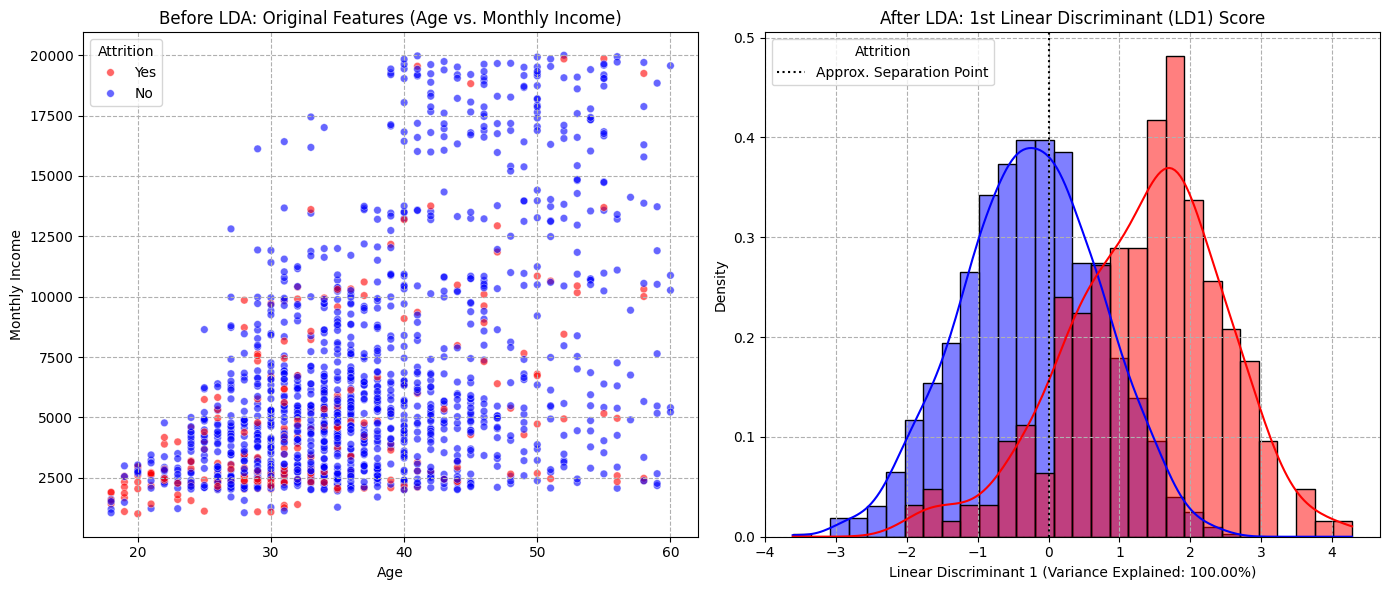

In [33]:

X_encoded = pd.get_dummies(X_raw, drop_first=True)
X_scaled = StandardScaler().fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X_scaled_df, y).transform(X_scaled_df)


plt.figure(figsize=(14, 6))
-
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=df['Age'],
    y=df['MonthlyIncome'],
    hue=y_labels,
    palette={'No': 'blue', 'Yes': 'red'},
    alpha=0.6,
    s=30
)
plt.title('Before LDA: Original Features (Age vs. Monthly Income)')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.grid(True, linestyle='--')
#
-
plt.subplot(1, 2, 2)

X_lda_df = pd.DataFrame(X_lda, columns=['LD1'])
X_lda_df['Attrition'] = y_labels


sns.histplot(
    data=X_lda_df,
    x='LD1',
    hue='Attrition',
    palette={'No': 'blue', 'Yes': 'red'},
    kde=True,
    stat="density",
    common_norm=False,
    bins=30
)

plt.axvline(x=0, color='black', linestyle=':', label='Approx. Separation Point')

plt.title('After LDA: 1st Linear Discriminant (LD1) Score')
plt.xlabel(f'Linear Discriminant 1 (Variance Explained: {lda.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel('Density')
plt.legend(title='Attrition')
plt.grid(True, linestyle='--')
#

plt.tight_layout()
plt.show()